In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')

In [4]:
df= pd.read_csv('drive/My Drive/BE FINAL/my_5class_shuffled.csv', index_col=None)
df.head()


,duration,"""protocol_type""","""service""",flag,"""src_bytes""","""dst_bytes""",land,wrong_fragment,urgent,"""hot""",num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_diff_srv_rate.1,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,308,18318,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,17,0.0,0.0,0.0,0.0,1.00,0.0,0.12,6,255,1.00,0.00,0.17,0.05,0.00,0.02,0.00,0.0,normal
1,0,udp,private,SF,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40,7,0.0,0.0,0.0,0.0,0.17,0.1,0.00,255,7,0.03,0.22,0.98,0.00,0.00,0.00,0.02,0.0,probe
2,0,tcp,http,SF,144,9569,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,13,0.0,0.0,0.0,0.0,1.00,0.0,0.23,55,255,1.00,0.00,0.02,0.01,0.00,0.00,0.00,0.0,normal
3,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0.0,0.0,1.0,1.0,0.50,1.0,0.00,255,1,0.00,0.48,0.42,0.00,0.11,0.00,0.43,1.0,probe
4,0,tcp,http,SF,220,253,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,16,24,0.0,0.0,0.0,0.0,1.00,0.0,0.08,16,255,1.00,0.00,0.06,0.01,0.00,0.00,0.00,0.0,normal


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148514 entries, 0 to 148513
Data columns (total 42 columns):
duration                       148514 non-null int64
 "protocol_type"               148514 non-null object
"service"                      148514 non-null object
flag                           148514 non-null object
"src_bytes"                    148514 non-null int64
 "dst_bytes"                   148514 non-null int64
land                           148514 non-null int64
 wrong_fragment                148514 non-null int64
urgent                         148514 non-null int64
 "hot"                         148514 non-null int64
num_failed_logins              148514 non-null int64
logged_in                      148514 non-null int64
num_compromised                148514 non-null int64
 root_shell                    148514 non-null int64
su_attempted                   148514 non-null int64
num_root                       148514 non-null int64
num_file_creations             148514 

In [6]:
list(set(df.dtypes.tolist()))


[dtype('O'), dtype('float64'), dtype('int64')]

In [7]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,duration,"""src_bytes""","""dst_bytes""",land,wrong_fragment,urgent,"""hot""",num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_diff_srv_rate.1,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,308,18318,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,17,0.0,0.0,0.0,0.0,1.00,0.0,0.12,6,255,1.00,0.00,0.17,0.05,0.00,0.02,0.00,0.0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40,7,0.0,0.0,0.0,0.0,0.17,0.1,0.00,255,7,0.03,0.22,0.98,0.00,0.00,0.00,0.02,0.0
2,0,144,9569,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,13,0.0,0.0,0.0,0.0,1.00,0.0,0.23,55,255,1.00,0.00,0.02,0.01,0.00,0.00,0.00,0.0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0.0,0.0,1.0,1.0,0.50,1.0,0.00,255,1,0.00,0.48,0.42,0.00,0.11,0.00,0.43,1.0
4,0,220,253,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,16,24,0.0,0.0,0.0,0.0,1.00,0.0,0.08,16,255,1.00,0.00,0.06,0.01,0.00,0.00,0.00,0.0


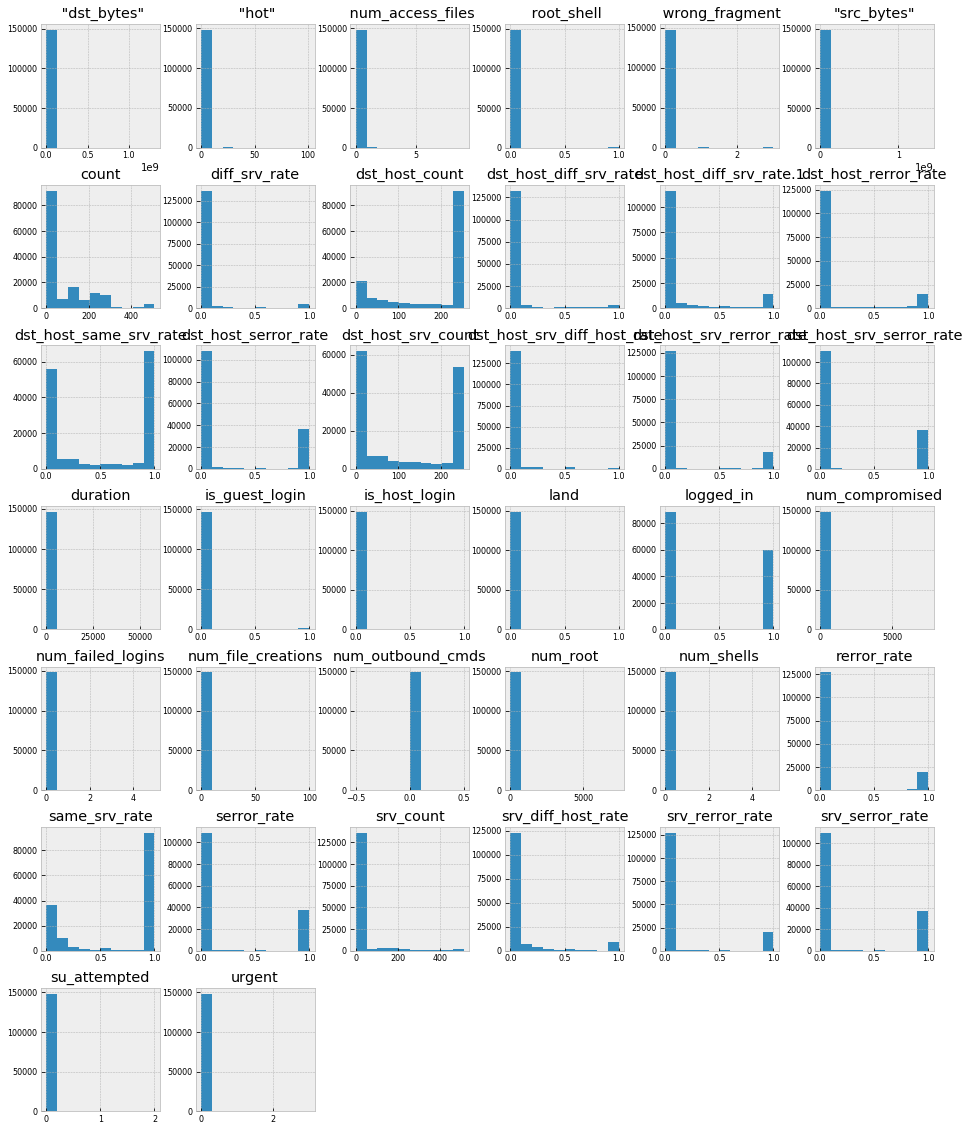

In [39]:
df_num.hist(figsize=(16, 20), bins=10, xlabelsize=8, ylabelsize=8);
plt.savefig('drive/My Drive/BE FINAL/nsl-kdd_final-code_results/eda/hist.png')


In [17]:
from collections import Counter
Counter(df["label"]) 

Counter({'dos': 53384,
         'normal': 77052,
         'probe': 14077,
         'r2l': 3749,
         'u2r': 252})

In [18]:
df.columns

Index(['duration', ' "protocol_type"', '"service"', 'flag', '"src_bytes"',
       ' "dst_bytes"', 'land', ' wrong_fragment', 'urgent', ' "hot"',
       'num_failed_logins', 'logged_in', 'num_compromised', ' root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       ' num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_diff_srv_rate.1',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label'],
      dtype='object')

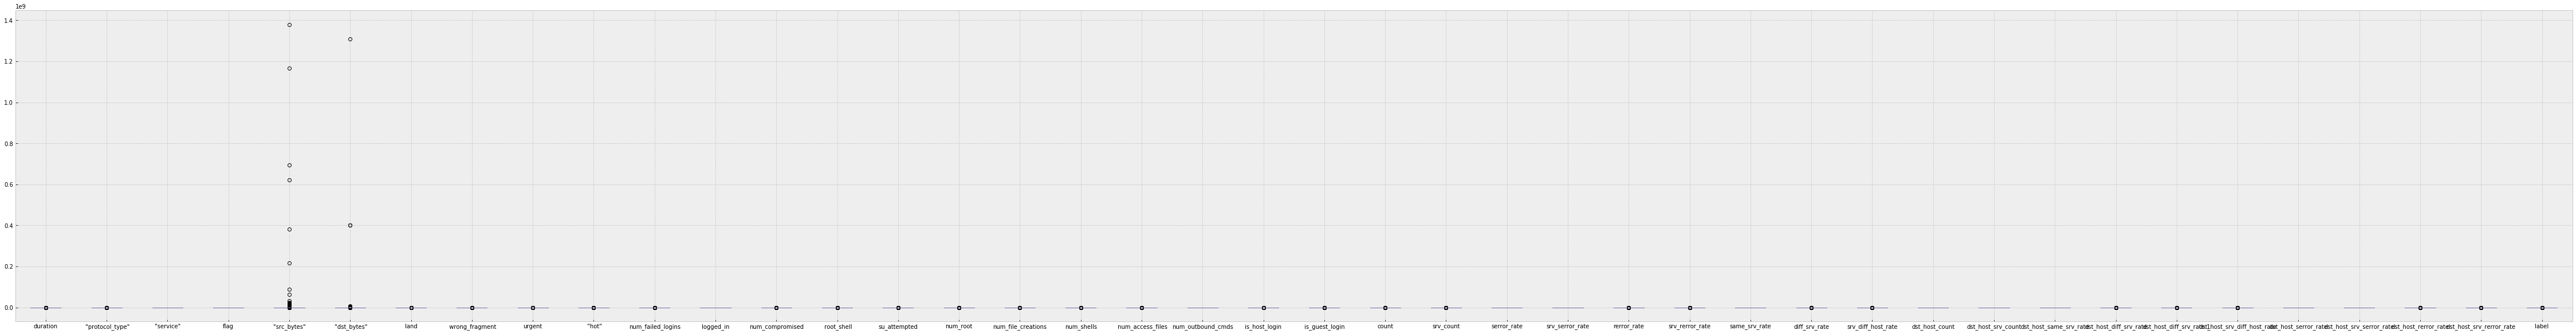

In [40]:
plt.figure(figsize = (80, 10))
boxplot = df.boxplot()
plt.savefig('drive/My Drive/BE FINAL/nsl-kdd_final-code_results/eda/box.png')


In [0]:
from sklearn.preprocessing import LabelEncoder
encodings = dict()
for c in df.columns:
    #print df[c].dtype
    if df[c].dtype == "object":
        encodings[c] = LabelEncoder() #to give numerical label to char type labels.
        encodings[c]
        df[c] = encodings[c].fit_transform(df[c])

In [42]:
X = df.iloc[:,0:41]
Y = df.iloc[:,41]
C = df.iloc[:,41]
T = df.iloc[:,0:41]
Y.head()

0    1
1    2
2    1
3    2
4    1
Name: label, dtype: int64

In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=25)
fit = bestfeatures.fit(X,Y)

In [0]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [0]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [32]:
featureScores


,Specs,Score
0,duration,1.175481e+08
1,"""protocol_type""",2.154840e+03
2,"""service""",1.134379e+05
3,flag,7.409422e+04
4,"""src_bytes""",3.142169e+10
5,"""dst_bytes""",1.617337e+10
6,land,2.528724e+01
7,wrong_fragment,4.754987e+03
8,urgent,5.026598e+03
9,"""hot""",1.145658e+05


In [33]:
print(featureScores.nlargest(25,'Score'))  #print 25 best features


                       Specs         Score
4                "src_bytes"  3.142169e+10
5                "dst_bytes"  1.617337e+10
0                   duration  1.175481e+08
22                     count  8.764422e+06
32        dst_host_srv_count  7.522226e+06
31            dst_host_count  1.716909e+06
23                 srv_count  3.174061e+05
9                      "hot"  1.145658e+05
2                  "service"  1.134379e+05
3                       flag  7.409422e+04
38  dst_host_srv_serror_rate  5.999674e+04
25           srv_serror_rate  5.886348e+04
24               serror_rate  5.848527e+04
37      dst_host_serror_rate  5.793128e+04
11                 logged_in  4.188595e+04
15                  num_root  3.970999e+04
12           num_compromised  3.345165e+04
33    dst_host_same_srv_rate  2.749395e+04
28             same_srv_rate  2.672419e+04
35  dst_host_diff_srv_rate.1  2.283622e+04
34    dst_host_diff_srv_rate  1.983643e+04
27           srv_rerror_rate  1.834598e+04
26         

In [34]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [35]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers


[7.74702845e-03 4.40329613e-02 3.03889691e-02 4.14282508e-02
 2.22592690e-02 9.07350921e-03 7.51093709e-05 1.17805670e-02
 7.48617337e-05 9.54120236e-03 3.87651618e-03 4.51261175e-02
 4.51802575e-03 3.83750763e-04 6.95076073e-05 3.39145741e-04
 2.11726622e-04 1.65952920e-04 1.78531789e-04 0.00000000e+00
 1.04446331e-04 6.41056316e-03 2.94426295e-02 1.72279079e-02
 8.02222486e-02 4.82844764e-02 2.50475173e-02 2.56934395e-02
 9.09306114e-02 2.77554563e-02 1.64077636e-02 2.81109395e-02
 3.01438380e-02 5.15052374e-02 3.40045854e-02 4.20799102e-02
 1.84700928e-02 6.11797353e-02 7.67076537e-02 3.94159933e-02
 1.95839513e-02]


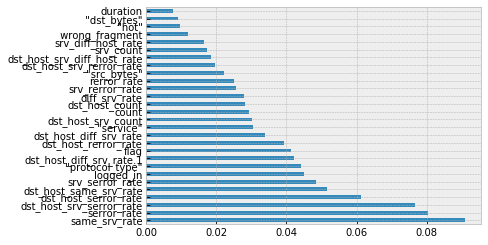

In [43]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(28).plot(kind='barh')
plt.savefig('drive/My Drive/BE FINAL/nsl-kdd_final-code_results/eda/imp.png')

plt.show()

In [0]:
X=X.drop(['land','su_attempted','num_outbound_cmds','is_host_login','urgent','num_failed_logins','su_attempted','num_file_creations','num_shells','srv_diff_host_rate'], axis = 1) 
T=T.drop(['land','su_attempted','num_outbound_cmds','is_host_login','urgent','num_failed_logins','su_attempted','num_file_creations','num_shells','srv_diff_host_rate'], axis = 1) 

In [38]:
T.head()

,duration,"""protocol_type""","""service""",flag,"""src_bytes""","""dst_bytes""",wrong_fragment,"""hot""",logged_in,num_compromised,root_shell,num_root,num_access_files,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_diff_srv_rate.1,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,24,9,308,18318,0,0,1,0,0,0,0,0,6,17,0.0,0.0,0.0,0.0,1.00,0.0,6,255,1.00,0.00,0.17,0.05,0.00,0.02,0.00,0.0
1,0,2,49,9,1,0,0,0,0,0,0,0,0,0,40,7,0.0,0.0,0.0,0.0,0.17,0.1,255,7,0.03,0.22,0.98,0.00,0.00,0.00,0.02,0.0
2,0,1,24,9,144,9569,0,0,1,0,0,0,0,0,1,13,0.0,0.0,0.0,0.0,1.00,0.0,55,255,1.00,0.00,0.02,0.01,0.00,0.00,0.00,0.0
3,0,1,49,1,0,0,0,0,0,0,0,0,0,0,2,1,0.0,0.0,1.0,1.0,0.50,1.0,255,1,0.00,0.48,0.42,0.00,0.11,0.00,0.43,1.0
4,0,1,24,9,220,253,0,0,1,0,0,0,0,0,16,24,0.0,0.0,0.0,0.0,1.00,0.0,16,255,1.00,0.00,0.06,0.01,0.00,0.00,0.00,0.0
